### Import libraries and data


In [2]:
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\Ensemble

c:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\Ensemble


In [3]:
#import libraries
import pandas as pd
import numpy as np

In [4]:
#get the data
data = pd.read_csv("Daily Bike Sharing.csv", 
                   index_col = "dteday", 
                   parse_dates = True)
data.head(1)

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
dteday,,,,,,,,,,,,,,,
2011-01-01,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985


In [5]:
#select variables
dataset = data.cnt.rename("y")
dataset.head(3)                       

dteday
2011-01-01     985
2011-01-02     801
2011-01-03    1349
Name: y, dtype: int64

### Data Transformation

In [6]:
#index
dataset = dataset.asfreq("D")
dataset.index

DatetimeIndex(['2011-01-01', '2011-01-02', '2011-01-03', '2011-01-04',
               '2011-01-05', '2011-01-06', '2011-01-07', '2011-01-08',
               '2011-01-09', '2011-01-10',
               ...
               '2012-12-22', '2012-12-23', '2012-12-24', '2012-12-25',
               '2012-12-26', '2012-12-27', '2012-12-28', '2012-12-29',
               '2012-12-30', '2012-12-31'],
              dtype='datetime64[ns]', name='dteday', length=731, freq='D')

### Visualization

<AxesSubplot: xlabel='dteday'>

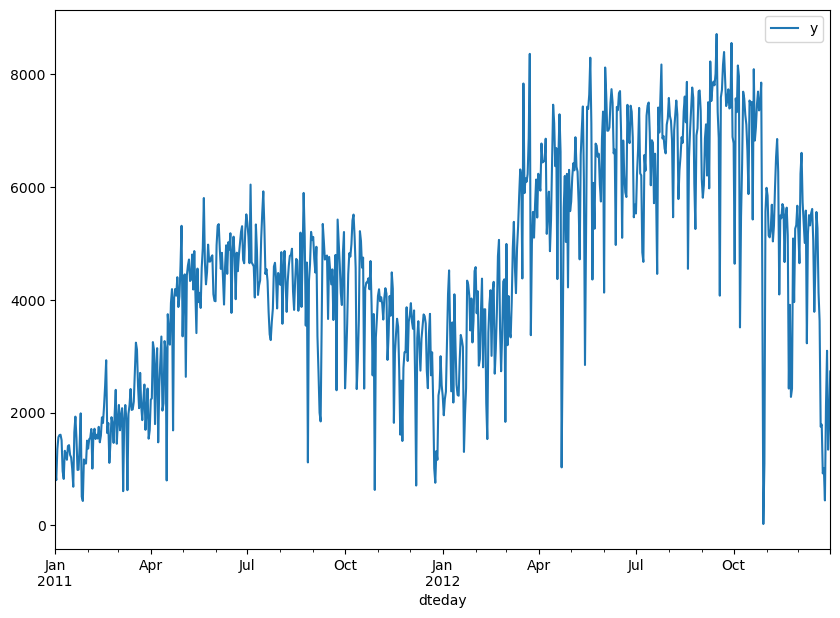

In [7]:
#viz
dataset.plot(figsize = (10, 7), legend = True)

### Training and Test Set

In [8]:
#Training and test set
test_days = 31
training_set = dataset.iloc[:-test_days]
test_set = dataset.iloc[-test_days:]
test_set.tail(1)

dteday
2012-12-31    2729
Freq: D, Name: y, dtype: int64

### Load predictions

In [9]:
#change directory
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\Ensemble

c:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\Ensemble


In [16]:
#load predictions
hw = pd.read_csv("predictions_hw.csv", index_col= [0], parse_dates=True)
tbats = pd.read_csv("predictions_tbats.csv", index_col= [0], parse_dates=True)
sarimax = pd.read_csv("predictions_sarimax.csv", index_col= [0], parse_dates=True)
tfp = pd.read_csv("predictions_tfp.csv", index_col= [0], parse_dates=True)
prophet_tuned = pd.read_csv("predictions_prophet_tuned.csv", index_col= [0], parse_dates=True)
xgboost = pd.read_csv("predictions_xgb.csv", index_col= [0], parse_dates=True)

In [17]:
#concatenate predictions
df = pd.concat([test_set,hw, tbats, sarimax, tfp, prophet_tuned, xgboost], axis = 1)
df.head()

,y,HW,TBATS,SARIMAX,TFP,prophet_tuned,XGBoost
2012-12-01,5191,4676.804684,4828.272249,4288.890069,4277.104874,4100.171314,3962.5825
2012-12-02,4649,4153.246795,4482.064414,4216.960615,3491.377455,3493.567193,2884.7270
2012-12-03,6234,4322.003783,4362.513961,5448.375761,4470.886722,5627.019024,6193.4644
2012-12-04,6606,4279.673415,4305.123489,5427.632450,4525.321998,5556.247572,6404.3150
2012-12-05,5729,4825.991667,4260.338328,5448.921386,4789.824913,5336.772905,5991.4067


### Ensemble forecast

In [18]:
df["ensemble"] = df.iloc[:,1:].mean(axis = 1)
df.head()

,y,HW,TBATS,SARIMAX,TFP,prophet_tuned,XGBoost,ensemble
2012-12-01,5191,4676.804684,4828.272249,4288.890069,4277.104874,4100.171314,3962.5825,4355.637615
2012-12-02,4649,4153.246795,4482.064414,4216.960615,3491.377455,3493.567193,2884.7270,3786.990579
2012-12-03,6234,4322.003783,4362.513961,5448.375761,4470.886722,5627.019024,6193.4644,5070.710609
2012-12-04,6606,4279.673415,4305.123489,5427.632450,4525.321998,5556.247572,6404.3150,5083.052321
2012-12-05,5729,4825.991667,4260.338328,5448.921386,4789.824913,5336.772905,5991.4067,5108.875983


### Viz

<AxesSubplot: >

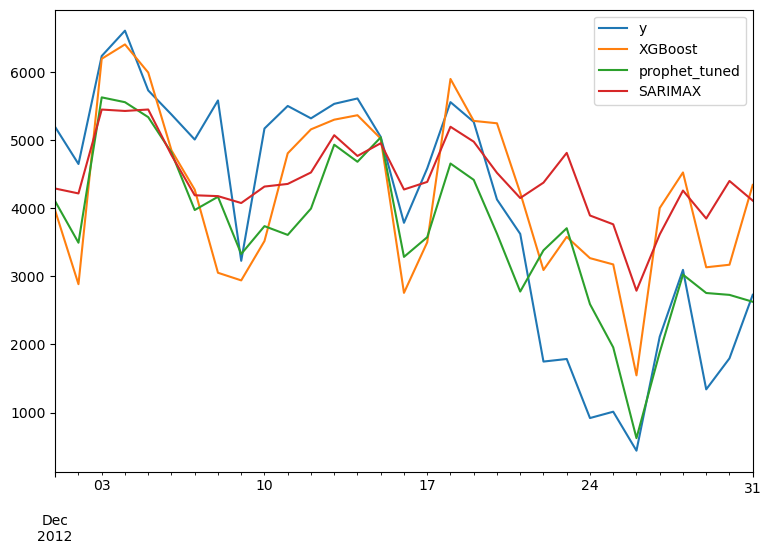

In [19]:
#visualization
df.y.plot(figsize = (9,6), legend = True)
df.XGBoost.plot(legend  = True)
df.prophet_tuned.plot(legend = True)
df.SARIMAX.plot(legend = True)

<AxesSubplot: >

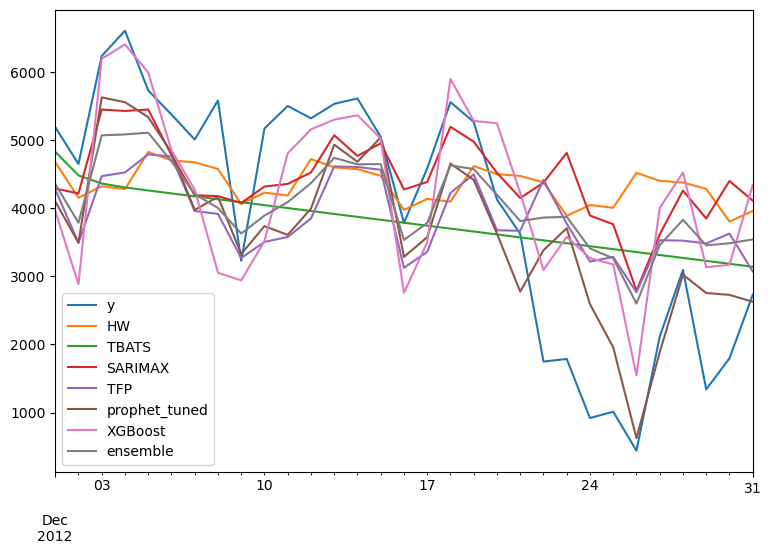

In [20]:
df.plot(figsize = (9,6), legend = True)

para mejorar, podrias probar eliminando HW o los Tbats que no estarian rindiendo mucho y mejorar Sarimax y 
TFP

### Model assessment

In [21]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(df.y, df.ensemble),0))
print(round(np.sqrt(mean_squared_error(df.y, df.ensemble)), 0))

1129.0
1304.0


In [22]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(df.y, df.ensemble)

61.7482084124519

### sin TBATS ni HW

In [18]:
#load predictions
#hw = pd.read_csv("predictions_hw.csv", index_col= [0], parse_dates=True)
#tbats = pd.read_csv("predictions_tbats.csv", index_col= [0], parse_dates=True)
sarimax = pd.read_csv("predictions_sarimax.csv", index_col= [0], parse_dates=True)
tfp = pd.read_csv("predictions_tfp.csv", index_col= [0], parse_dates=True)
prophet_tuned = pd.read_csv("predictions_prophet_tuned.csv", index_col= [0], parse_dates=True)
xgboost = pd.read_csv("predictions_xgb.csv", index_col= [0], parse_dates=True)

In [19]:
#concatenate predictions
df = pd.concat([test_set, sarimax, tfp, prophet_tuned, xgboost], axis = 1)
df.head()

,y,SARIMAX,TFP,prophet_tuned,XGBoost
2012-12-01,5191,4288.890069,4277.104874,4100.171314,3962.5825
2012-12-02,4649,4216.960615,3491.377455,3493.567193,2884.7270
2012-12-03,6234,5448.375761,4470.886722,5627.019024,6193.4644
2012-12-04,6606,5427.632450,4525.321998,5556.247572,6404.3150
2012-12-05,5729,5448.921386,4789.824913,5336.772905,5991.4067


In [20]:
df["ensemble"] = df.iloc[:,1:].mean(axis = 1)
df.head()

,y,SARIMAX,TFP,prophet_tuned,XGBoost,ensemble
2012-12-01,5191,4288.890069,4277.104874,4100.171314,3962.5825,4157.187189
2012-12-02,4649,4216.960615,3491.377455,3493.567193,2884.7270,3521.658066
2012-12-03,6234,5448.375761,4470.886722,5627.019024,6193.4644,5434.936477
2012-12-04,6606,5427.632450,4525.321998,5556.247572,6404.3150,5478.379255
2012-12-05,5729,5448.921386,4789.824913,5336.772905,5991.4067,5391.731476


<AxesSubplot: >

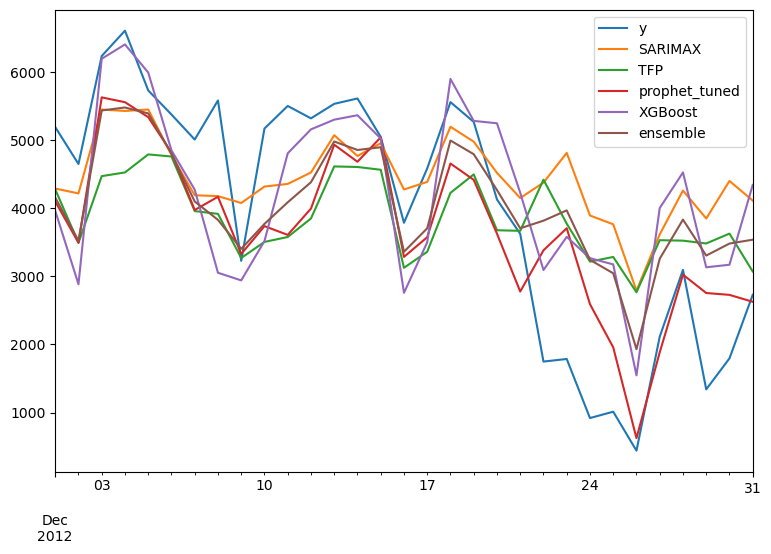

In [22]:
#visualization
df.plot(figsize = (9,6), legend = True)

In [23]:
#MAE and RMSE
from sklearn.metrics import mean_squared_error, mean_absolute_error
print(round(mean_absolute_error(df.y, df.ensemble),0))
print(round(np.sqrt(mean_squared_error(df.y, df.ensemble)), 0))

1034.0
1216.0


In [24]:
#MAPE function
def MAPE(y_true, y_pred):
  y_true, y_pred = np.array(y_true), np.array(y_pred)
  return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
MAPE(df.y, df.ensemble)

54.09533917152027